In [3]:
import numpy as np
import pandas as pd
import SAGEnet.plot
import SAGEnet.tools
import matplotlib.pyplot as plt
import scipy.stats
from SAGEnet.data import ReferenceGenomeDataset, VariantDataset
import SAGEnet.attributions

#### load data

In [4]:
gene_of_interest = 'ENSG00000134202'
tss_data_path='/homes/gws/aspiro17/seqtoexp/PersonalGenomeExpression-dev/input_data/gene-ids-and-positions.tsv'
hg38_file_path='/data/tuxm/project/Decipher-multi-modality/data/genome/hg38.fa'
input_len=40000
pos_of_interest = 109731286
ism_win_size=150
pos_idx_in_seq = SAGEnet.tools.get_pos_idx_in_seq(gene_of_interest,pos_of_interest,tss_data_path,input_len=input_len,allow_reverse_complement=False)
start_of_interest_idx = pos_idx_in_seq-ism_win_size//2
end_of_interest_idx = pos_idx_in_seq+ism_win_size//2

In [5]:
gene_meta_info = pd.read_csv(tss_data_path, sep="\t")
selected_genes_meta = gene_meta_info.set_index('ensg', drop=False).loc[[gene_of_interest]]
dataset = ReferenceGenomeDataset(gene_metadata=selected_genes_meta,hg38_file_path=hg38_file_path,allow_reverse_complement=0,input_len=input_len,single_seq=True)
rel_ref_seq = dataset[0][0][:,start_of_interest_idx:end_of_interest_idx].numpy()
rel_ref_seq.shape

(4, 150)

In [6]:
# create variant df 
ism_ex_df = pd.DataFrame()
variant_nuc='T'
ism_ex_df['gene'] = [gene_of_interest]
ism_ex_df['chr'] = selected_genes_meta['chr'].values
ism_ex_df['pos'] = [pos_of_interest]
ism_ex_df['ref'] = ['G']
ism_ex_df['alt'] = [variant_nuc]
#ism_ex_df.to_csv('/data/mostafavilab/personal_genome_expr/attributions/ism/ENSG00000134202_ism_ex.csv')

var_inserted_dataset = VariantDataset(gene_metadata=selected_genes_meta,hg38_file_path=hg38_file_path,variant_info = ism_ex_df,allow_reverse_complement=0,input_len=input_len,single_seq=True)
rel_ref_seq_var_inserted = var_inserted_dataset[0][0][:,start_of_interest_idx:end_of_interest_idx].numpy()
rel_ref_seq_var_inserted.shape

inserting variants


(4, 150)

#### ISM example

##### pSAGEnet 

attributions.shape:(4, 150)
mean.shape:(1, 150)
centered.shape:(4, 150)
attributions.shape:(4, 150)
mean.shape:(1, 150)
centered.shape:(4, 150)


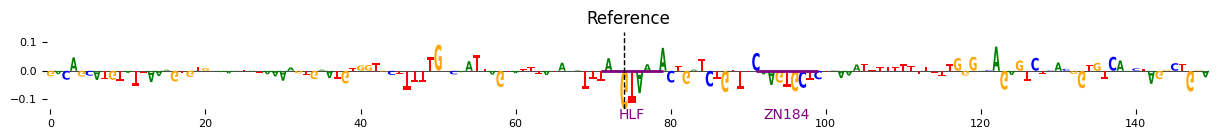

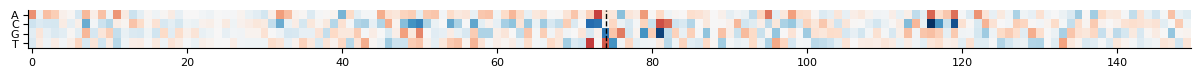

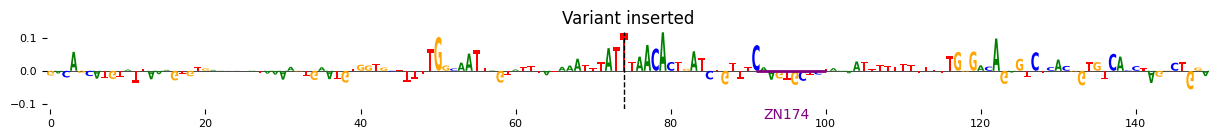

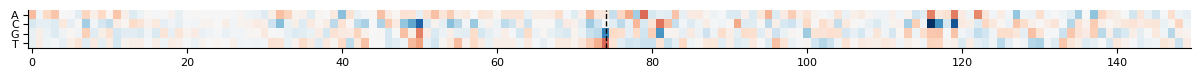

In [25]:
personal_model = np.load(f'/data/mostafavilab/personal_genome_expr/attributions/ism/personal_model/{gene_of_interest}_ism_res.npy')
var_personal_model = np.load(f'/data/mostafavilab/personal_genome_expr/attributions/ism/personal_model/{gene_of_interest}_{variant_nuc}_inserted_ism_res.npy')
personal_model_personal_out = personal_model[1,:,:,1]
var_personal_model_personal_out = var_personal_model[1,:,:,1]

personal_model_personal_out=SAGEnet.tools.mean_center_attributions(personal_model_personal_out,axis=0)
var_personal_model_personal_out=SAGEnet.tools.mean_center_attributions(var_personal_model_personal_out,axis=0)
seqlets_personal_model_personal_out = SAGEnet.attributions.get_annotated_seqlets(personal_model_personal_out,rel_ref_seq)
seqlets_var_personal_model_personal_out = SAGEnet.attributions.get_annotated_seqlets(var_personal_model_personal_out,rel_ref_seq_var_inserted)

SAGEnet.plot.plot_attribs(personal_model_personal_out*rel_ref_seq,'Reference',annotations=seqlets_personal_model_personal_out,center_line=True)
SAGEnet.plot.plot_heatmap(personal_model_personal_out,center_line=True)
SAGEnet.plot.plot_attribs(var_personal_model_personal_out*rel_ref_seq_var_inserted,'Variant inserted',annotations=seqlets_var_personal_model_personal_out,center_line=True)
SAGEnet.plot.plot_heatmap(var_personal_model_personal_out,center_line=True)

##### rSAGEnet

attributions.shape:(4, 150)
mean.shape:(1, 150)
centered.shape:(4, 150)
attributions.shape:(4, 150)
mean.shape:(1, 150)
centered.shape:(4, 150)


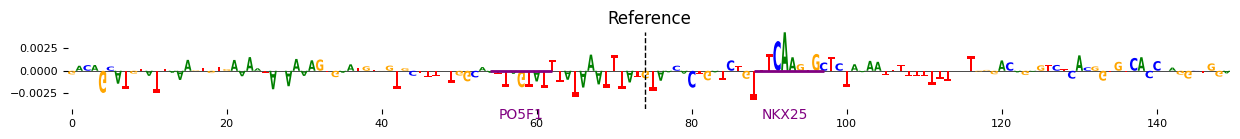

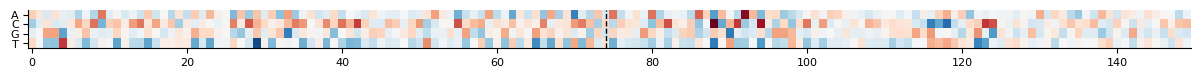

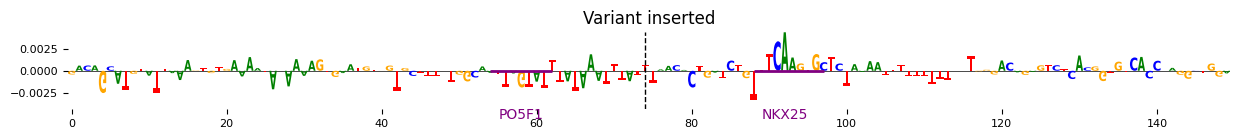

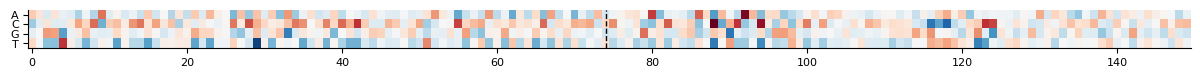

In [28]:
ref_model = np.load(f'/data/mostafavilab/personal_genome_expr/attributions/ism/ref_model/{gene_of_interest}_ism_res.npy')
var_ref_model = np.load(f'/data/mostafavilab/personal_genome_expr/attributions/ism/ref_model/{gene_of_interest}_{variant_nuc}_inserted_ism_res.npy')

ref_model=SAGEnet.tools.mean_center_attributions(ref_model,axis=0)
var_ref_model=SAGEnet.tools.mean_center_attributions(var_ref_model,axis=0)
seqlets_ref_model = SAGEnet.attributions.get_annotated_seqlets(ref_model,rel_ref_seq)
seqlets_var_ref_model = SAGEnet.attributions.get_annotated_seqlets(var_ref_model,rel_ref_seq_var_inserted)

SAGEnet.plot.plot_attribs(ref_model*rel_ref_seq,'Reference',annotations=seqlets_ref_model,center_line=True)
SAGEnet.plot.plot_heatmap(ref_model,center_line=True)
SAGEnet.plot.plot_attribs(var_ref_model*rel_ref_seq_var_inserted,'Variant inserted',annotations=seqlets_var_ref_model,center_line=True)
SAGEnet.plot.plot_heatmap(var_ref_model,center_line=True)

##### enformer 

attributions.shape:(4, 150)
mean.shape:(1, 150)
centered.shape:(4, 150)
attributions.shape:(4, 150)
mean.shape:(1, 150)
centered.shape:(4, 150)
error in get_annotated_seqlets: need at least one array to concatenate


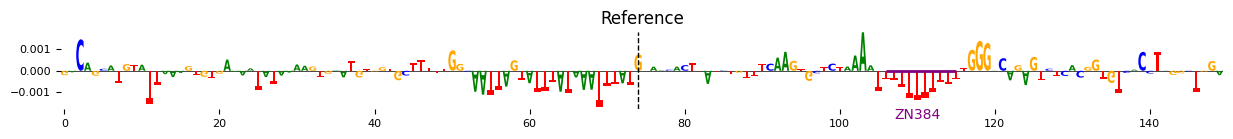

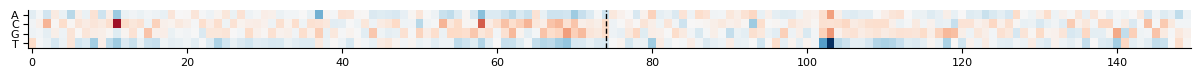

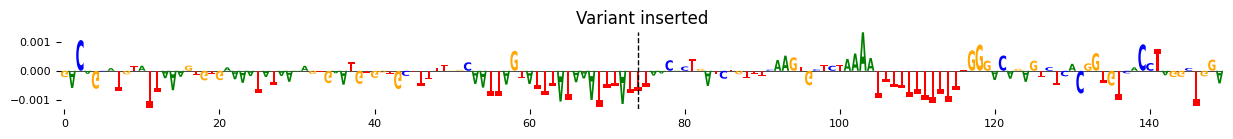

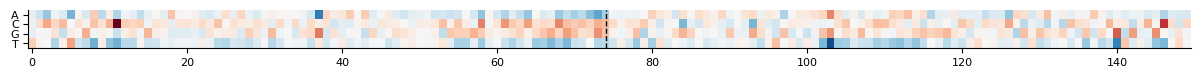

In [40]:
enformer = np.load(f'/data/mostafavilab/personal_genome_expr/attributions/ism/enformer_model/{gene_of_interest}_ism_res.npy')
var_enformer= np.load(f'/data/mostafavilab/personal_genome_expr/attributions/ism/enformer_model/{gene_of_interest}_{variant_nuc}_inserted_ism_res.npy')

enformer=SAGEnet.tools.mean_center_attributions(enformer,axis=0)
var_enformer=SAGEnet.tools.mean_center_attributions(var_enformer,axis=0)
seqlets_enformer = SAGEnet.attributions.get_annotated_seqlets(enformer,rel_ref_seq)
seqlets_var_enformer = SAGEnet.attributions.get_annotated_seqlets(var_enformer,rel_ref_seq_var_inserted)

SAGEnet.plot.plot_attribs(enformer*rel_ref_seq,'Reference',annotations=seqlets_enformer,center_line=True)
SAGEnet.plot.plot_heatmap(enformer,center_line=True)
SAGEnet.plot.plot_attribs(var_enformer*rel_ref_seq_var_inserted,'Variant inserted',annotations=seqlets_var_enformer,center_line=True)
SAGEnet.plot.plot_heatmap(var_enformer,center_line=True)

#### seqlet position analysis

In [17]:
high_performance_train_genes = np.load('/data/mostafavilab/personal_genome_expr/attributions/gradients/high_performance_genes.npy',allow_pickle=True)
high_performance_train_genes.shape

(466,)

<Figure size 640x480 with 0 Axes>

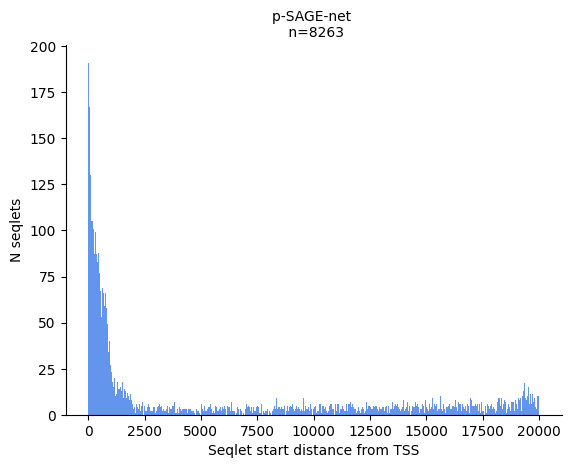

<Figure size 640x480 with 0 Axes>

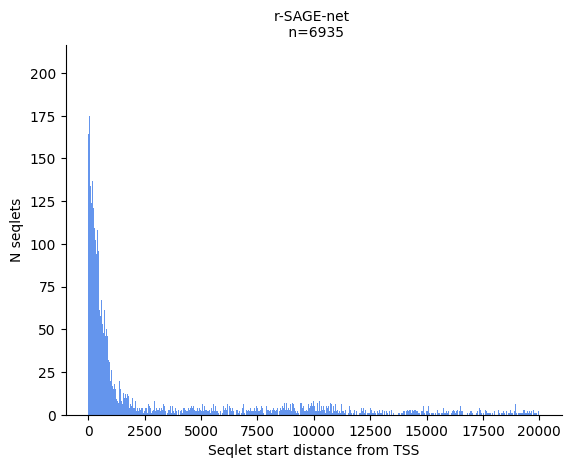

In [18]:
ref_model_dir='/data/mostafavilab/personal_genome_expr/attributions/gradients/ref_model/eval_on_ref_seq/centered_grads_analysis/additional_flanks=2/'
personal_model_personal_dir='/data/mostafavilab/personal_genome_expr/attributions/gradients/personal_model/metric_train_gene_gene/eval_on_ref_seq/epoch=8.ckpt/centered_personal_seq_1_idx_grads_analysis/additional_flanks=2/'

personal_model_personal_summary = SAGEnet.attributions.summarize_seqlet_annotations(personal_model_personal_dir,high_performance_train_genes,seqlet_threshold=0.005)
ref_model_summary = SAGEnet.attributions.summarize_seqlet_annotations(ref_model_dir,high_performance_train_genes,seqlet_threshold=0.005)

SAGEnet.plot.plot_hist(np.abs(input_len//2-personal_model_personal_summary[2]),xlabel='Seqlet start distance from TSS',ylabel='N seqlets',title='p-SAGE-net',show_x0=False,show_mean=False,bins=1000)
SAGEnet.plot.plot_hist(np.abs(input_len//2-ref_model_summary[2]),xlabel='Seqlet start distance from TSS',ylabel='N seqlets',title='r-SAGE-net',show_x0=False,show_mean=False,bins=1000)

<Figure size 640x480 with 0 Axes>

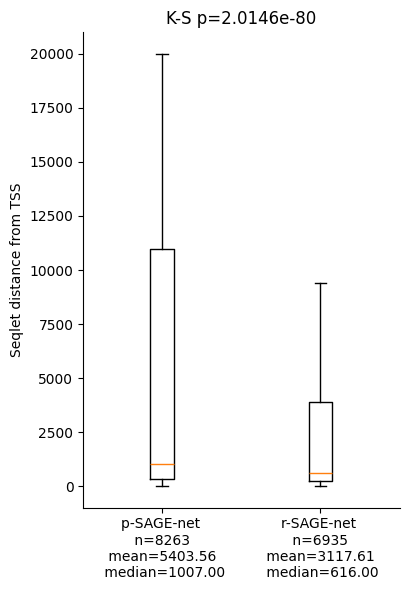

In [19]:
input_len=40000
SAGEnet.plot.boxplot_compare(np.abs(input_len//2-personal_model_personal_summary[2]),np.abs(input_len//2-ref_model_summary[2]),stat_test='ks',arra_t='p-SAGE-net',arrb_t='r-SAGE-net',ylabel='Seqlet distance from TSS',fig_width=4)